In [88]:
#conv Neural Network
# tensorboard --logdir=/home/ncc/notebook/learn/tensorboard/log
"""
created by kim Seong jung

"""
import numpy as np 
import tensorflow as tf
import re
import random
import math
import time
import matplotlib.pyplot as plt
%matplotlib inline
import os

file_locate='/home/user01/hdd1/train_model/'
sess = tf.InteractiveSession()
aug_flag=False
model_number=2
if aug_flag == True :

    img_row = 64
    img_col = 64
    in_ch =1
else:
    img_row = 64
    img_col = 64
    in_ch =1
    
divide_flag= False
restore_flag =True
save_flag=True
learning_rate=1e-4

model_save_path='/home/user01/hdd1/aug_model_save/'+str(model_number)+'/'
if os.path.isdir(model_save_path)==False:
    print 'a'
    os.mkdir(model_save_path)
if restore_flag ==True:
    restore_path=model_save_path
batch_size=60
print img_row ,img_col
n_classes =2

out_ch1=200
out_ch2=200
out_ch3=200
out_ch4=200
out_ch5=200


fully_ch1=1024
fully_ch2 =1024
fully_ch3 =1024



strides_1=[1,2,2,1]
strides_2=[1,1,1,1]
strides_3=[1,1,1,1]
strides_4=[1,1,1,1]
strides_5=[1,1,1,1]


x= tf.placeholder("float",shape=[None,img_col , img_row , in_ch],  name = 'x-input')
y_=tf.placeholder("float",shape=[None , n_classes] , name = 'y-input')
keep_prob = tf.placeholder("float")

x_image= tf.reshape(x,[-1,img_row,img_col,in_ch])

iterate=1



weight_row =3 ; weight_col=3


pooling_row_size1=int(img_row/2)
pooling_row_size2=int(pooling_row_size1/2)
pooling_row_size3=int(pooling_row_size2/2)
pooling_row_size4=int(pooling_row_size3/2)
pooling_row_size5=int(pooling_row_size4/2)
pooling_col_size1=int(img_col/2)
pooling_col_size2=int(pooling_col_size1/2)
pooling_col_size3=int(pooling_col_size2/2)
pooling_col_size4=int(pooling_col_size3/2)
pooling_col_size5=int(pooling_col_size4/2)

print img_col , img_row

64 64
64 64


# Restore Weight and Bias

In [89]:
import os 
os.getcwd()

'/home/user01/ASAN/ASAN'

In [90]:
val_path='/home/user01/hdd1/slice_numpy/mal/001_3518_target_3518_np.npy'
val_img = np.load(val_path)
val_lab = np.zeros([len(val_img) ,2])
test_path='/home/user01/hdd1/slice_numpy/mal/002_4667_target_4667_np.npy'
test_img = np.load(test_path)
test_lab = np.zeros([len(test_img) ,2])
val_path_1='/home/user01/hdd1/slice_numpy/mal/003_371_target_371_np.npy'
val_img_1 = np.load(val_path_1)
val_lab_1 = np.zeros([len(val_img_1) ,2])
val_path_2='/home/user01/hdd1/slice_numpy/mal/002_4668_target_4668_np.npy'
val_img_2 = np.load(val_path_2)
val_lab_2 = np.zeros([len(val_img_2) ,2])

print np.shape(val_img)

(176, 64, 64, 1)


In [91]:
train_img=np.load('/home/user01/hdd1/train_model/train_img_2.npy')
print np.shape(train_img)


(50000, 64, 64, 1)


In [92]:
train_lab=np.load('/home/user01/hdd1/train_model/train_lab_2.npy')
print np.shape(train_lab)


(50000, 2)


In [93]:
"""def weight_variable(name,shape):
    #initial = tf.truncated_normal(shape , stddev=0.1)
    initial = tf.get_variable(name,shape=shape , initializer = tf.contrib.layers.xavier_initializer())
    return tf.Variable(initial)"""
with tf.device('/gpu:1'):
    def bias_variable(shape):
        initial = tf.constant(0.1 , shape=shape)
        return tf.Variable(initial)



In [94]:
with tf.device('/gpu:1'):
    def next_batch(batch_size , image , label):
        
        batch_x = np.zeros([batch_size,64,64,1])
        batch_y = np.zeros([batch_size,2])

        indexs=np.random.choice(40000,batch_size)
        for i,ind in enumerate(indexs):
            batch_x[i] = image[ind]
            batch_y[i] = label[ind]
        return batch_x, batch_y


In [95]:
with tf.device('/gpu:1'):

    def conv2d(x,w,strides_):
        return tf.nn.conv2d(x,w, strides = strides_, padding='SAME')
    def max_pool_2x2(x):
        return tf.nn.max_pool(x , ksize=[1,2,2,1] ,strides = [1,2,2,1] , padding = 'SAME')

In [96]:

with tf.device('/gpu:1'):
    if restore_flag==False:
        with tf.variable_scope("layer1") as scope:
            try:
                w_conv1 = tf.get_variable("W1",[weight_row,weight_col,in_ch,out_ch1] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
        with tf.variable_scope("layer1") as scope:
            try:
                b_conv1 = bias_variable([out_ch1])
            except:
                scope.reuse_variables()
                b_conv1 = bias_variable([out_ch1])
        with tf.variable_scope('layer2') as scope:
            try:
                w_conv2 = tf.get_variable("W2",[weight_row,weight_col,out_ch1,out_ch2] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_conv2 = tf.get_variable("W2",[weight_row,weight_col,out_ch1,out_ch2] , initializer = tf.contrib.layers.xavier_initializer())

        with tf.variable_scope('layer2') as scope:
            try:
                b_conv2= bias_variable([out_ch2])
            except:
                scope.reuse_variables()
                b_conv2= bias_variable([out_ch2])

        with tf.variable_scope('layer3') as scope:
            try:
                w_conv3 = tf.get_variable("W3" ,[weight_row,weight_col,out_ch2,out_ch3] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_conv3 = tf.get_variable("W3" ,[weight_row,weight_col,out_ch2,out_ch3] , initializer = tf.contrib.layers.xavier_initializer())
        with tf.variable_scope('layer3') as scope:
            try:
                b_conv3 = bias_variable([out_ch3])
            except:
                scope.reuse_variables()
                b_conv3 = bias_variable([out_ch3])

        with tf.variable_scope('layer4') as scope:
            try:
                w_conv4 =tf.get_variable("W4" ,[weight_row,weight_col,out_ch3,out_ch4] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_conv3 = tf.get_variable("W4" ,[weight_row,weight_col,out_ch3,out_ch4] , initializer = tf.contrib.layers.xavier_initializer())
        with tf.variable_scope('layer4') as scope:
            try:
                b_conv4 = bias_variable([out_ch4])
            except:
                scope.reuse_variables()
                b_conv3 = bias_variable([out_ch4])

        with tf.variable_scope('layer5') as scope:
            try:
                w_conv5 = tf.get_variable("W5",[weight_row,weight_col,out_ch4,out_ch5] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_conv3 = tf.get_variable("W5" ,[weight_row,weight_col,out_ch4,out_ch5] , initializer = tf.contrib.layers.xavier_initializer())
        with tf.variable_scope('layer5') as scope:
            try:
                b_conv5 = bias_variable([out_ch5])
            except:
                scope.reuse_variables()
                b_conv3 = bias_variable([out_ch5])


In [97]:

with tf.device('/gpu:1'):
    if restore_flag==True:
        "model was restroed"
        with tf.variable_scope("layer1") as scope:
            try:
                w_conv1 = tf.Variable(np.load(restore_path+'/w_conv1.npy'),name="W1")
            except:
                scope.reuse_variables()
                w_conv1 = tf.Variable(np.load(restore_path+'/w_conv1.npy'),name="W1")
        with tf.variable_scope("layer1") as scope:
            try:
                b_conv1 = tf.Variable(np.load(restore_path+'/b_conv1.npy'),name="B1")
            except:
                scope.reuse_variables()
                b_conv1 =tf.Variable(np.load(restore_path+'/b_conv1.npy'),name="B1")
        with tf.variable_scope("layer2") as scope:
            try:
                w_conv2 = tf.Variable(np.load(restore_path+'/w_conv2.npy'),name="W2")
            except:
                scope.reuse_variables()
                w_conv2 = tf.Variable(np.load(restore_path+'/w_conv2.npy'),name="W2")
        with tf.variable_scope("layer2") as scope:
            try:
                b_conv2 = tf.Variable(np.load(restore_path+'/b_conv2.npy'),name="B2")
            except:
                scope.reuse_variables()
                b_conv2 =tf.Variable(np.load(restore_path+'/b_conv2.npy'),name="B2")
        with tf.variable_scope("layer3") as scope:
            try:
                w_conv3 = tf.Variable(np.load(restore_path+'/w_conv3.npy'),name="W3")
            except:
                scope.reuse_variables()
                w_conv3 = tf.Variable(np.load(restore_path+'/w_conv3.npy'),name="W3")
        with tf.variable_scope("layer3") as scope:
            try:
                b_conv3 = tf.Variable(np.load(restore_path+'/b_conv3.npy'),name="B3")
            except:
                scope.reuse_variables()
                b_conv3 =tf.Variable(np.load(restore_path+'/b_conv3.npy'),name="B3")
        with tf.variable_scope("layer4") as scope:
            try:
                w_conv4 = tf.Variable(np.load(restore_path+'/w_conv4.npy'),name="W4")
            except:
                scope.reuse_variables()
                w_conv4 = tf.Variable(np.load(restore_path+'/w_conv4.npy'),name="W4")
        with tf.variable_scope("layer4") as scope:
            try:
                b_conv4 = tf.Variable(np.load(restore_path+'/b_conv4.npy'),name="B4")
            except:
                scope.reuse_variables()
                b_conv4 =tf.Variable(np.load(restore_path+'/b_conv4.npy'),name="B4")
        with tf.variable_scope("layer5") as scope:
            try:
                w_conv5 = tf.Variable(np.load(restore_path+'/w_conv5.npy'),name="W5")
            except:
                scope.reuse_variables()
                w_conv5 = tf.Variable(np.load(restore_path+'/w_conv5.npy'),name="W5")
        with tf.variable_scope("layer5") as scope:
            try:
                b_conv5 = tf.Variable(np.load(restore_path+'/b_conv5.npy'),name="B5")
            except:
                scope.reuse_variables()
                b_conv5 =tf.Variable(np.load(restore_path+'/b_conv5.npy'),name="B5")

In [98]:
#conncect hidden layer 
with tf.device('/gpu:1'):
    h_conv1 = tf.nn.relu(conv2d(x_image , w_conv1 ,strides_1)+b_conv1)
    h_conv2 = tf.nn.relu(conv2d(h_conv1 , w_conv2 ,strides_2)+b_conv2)
    h_conv2 = max_pool_2x2(h_conv2)#pooling
    
    h_conv3 = tf.nn.relu(conv2d(h_conv2 , w_conv3,strides_3)+b_conv3)
    h_conv4 = tf.nn.relu(conv2d(h_conv3 , w_conv4,strides_4)+b_conv4)
    h_pool4 = max_pool_2x2(h_conv4) #pooling 

    h_conv5 = tf.nn.relu(conv2d(h_conv4, w_conv5,strides_5)+b_conv5)
    h_conv5= max_pool_2x2(h_conv5) #pooling 

    print h_conv1
    print h_conv2
    print h_conv3
    print h_conv4
    print h_conv5
    


Tensor("Relu_16:0", shape=(?, 32, 32, 200), dtype=float32, device=/device:GPU:1)
Tensor("MaxPool_6:0", shape=(?, 16, 16, 200), dtype=float32, device=/device:GPU:1)
Tensor("Relu_18:0", shape=(?, 16, 16, 200), dtype=float32, device=/device:GPU:1)
Tensor("Relu_19:0", shape=(?, 16, 16, 200), dtype=float32, device=/device:GPU:1)
Tensor("MaxPool_8:0", shape=(?, 8, 8, 200), dtype=float32, device=/device:GPU:1)


In [99]:
end_conv = h_conv5
#print conv2d(h_pool1 , w_conv2).get_shape()
end_conv_row=int(h_conv5.get_shape()[1])
end_conv_col=int(h_conv5.get_shape()[2])
end_conv_ch=int(h_conv5.get_shape()[3])
#connect fully connected layer 

In [100]:
#connect fully connected layer 
if restore_flag==False:
    with tf.device('/gpu:1'):
        with tf.variable_scope("fc1") as scope:
            try:
                w_fc1=tf.get_variable("fc1_W",[end_conv_col*end_conv_row*end_conv_ch,fully_ch1] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_fc1=tf.get_variable("fc1_W",[end_conv_col*end_conv_row*end_conv_ch,fully_ch1] , initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_fc1 = bias_variable([fully_ch1])
            except:
                scope.reuse_variables()
                b_fc1 = bias_variable([fully_ch1])
elif restore_flag==True:
    with tf.device('/gpu:1'):
        with tf.variable_scope("fc1") as scope:
            try:
                w_fc1=tf.Variable(np.load(restore_path+'/w_fc1.npy'),name="fc1_W")
            except:
                scope.reuse_variables()
                w_fc1=tf.Variable(np.load(restore_path+'/w_fc1.npy'),name="fc1_W")
            try:
                b_fc1=tf.Variable(np.load(restore_path+'/b_fc1.npy'),name="fc1_B")
            except:
                scope.reuse_variables()
                b_fc1=tf.Variable(np.load(restore_path+'/b_fc1.npy'),name="fc1_B")

        
with tf.device('/gpu:1'): # flat conv layer 
    end_flat_conv =tf.reshape(end_conv, [-1,end_conv_col*end_conv_row*end_conv_ch])
   
with tf.device('/gpu:1'): # connect flat layer with fully  connnected layer 
    h_fc1 = tf.nn.relu(tf.matmul(end_flat_conv , w_fc1)+ b_fc1)
    h_fc1 = tf.nn.dropout(h_fc1, keep_prob)

In [101]:

#connect fully connected layer 
if restore_flag==False:
    with tf.device('/gpu:1'):
        with tf.variable_scope("fc2") as scope:
            try:
                w_fc2=tf.get_variable("fc2_W",[fully_ch1,fully_ch2] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_fc2=tf.get_variable("fc2_W",[fully_ch1,fully_ch2] , initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_fc2 = bias_variable([fully_ch2])
            except:
                scope.reuse_variables()
                b_fc2 = bias_variable([fully_ch2])
elif restore_flag==True:
    with tf.device('/gpu:1'):
        with tf.variable_scope("fc2") as scope:
            try:
                w_fc2=tf.Variable(np.load(restore_path+'/w_fc2.npy'),name="fc2_W")
            except:
                scope.reuse_variables()
                w_fc2=tf.Variable(np.load(restore_path+'/w_fc2.npy'),name="fc2_W")
            try:
                b_fc2=tf.Variable(np.load(restore_path+'/b_fc2.npy'),name="fc2_B")
            except:
                scope.reuse_variables()
                b_fc2=tf.Variable(np.load(restore_path+'/b_fc2.npy'),name="fc2_B")

with tf.device('/gpu:1'): # connect flat layer with fully  connnected layer 
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1 , w_fc2)+ b_fc2)
    h_fc2 = tf.nn.dropout(h_fc2, keep_prob)

In [102]:
#connect fully connected layer 
if restore_flag==False:
    with tf.device('/gpu:1'):
        with tf.variable_scope("fc3") as scope:
            try:
                w_fc3=tf.get_variable("fc3_W",[fully_ch2,fully_ch3] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_fc3=tf.get_variable("fc3_W",[fully_ch2,fully_ch3] , initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_fc3 = bias_variable([fully_ch3])
            except:
                scope.reuse_variables()
                b_fc3 = bias_variable([fully_ch3])
elif restore_flag==True:
    with tf.device('/gpu:1'):
        with tf.variable_scope("fc3") as scope:
            try:
                w_fc3=tf.Variable(np.load(restore_path+'/w_fc3.npy'),name="fc3_W")
            except:
                scope.reuse_variables()
                w_fc3=tf.Variable(np.load(restore_path+'/w_fc3.npy'),name="fc3_W")
            try:
                b_fc3=tf.Variable(np.load(restore_path+'/b_fc3.npy'),name="fc3_B")
            except:
                scope.reuse_variables()
                b_fc3=tf.Variable(np.load(restore_path+'/b_fc3.npy',name="fc3_B"))

with tf.device('/gpu:1'): # connect flat layer with fully  connnected layer 
    h_fc3 = tf.nn.relu(tf.matmul(h_fc2 , w_fc3)+ b_fc3)
    h_fc3 = tf.nn.dropout(h_fc3, keep_prob)

In [103]:
end_fc=h_fc3

In [104]:
if restore_flag==False:
    with tf.device('/gpu:1'):
        with tf.variable_scope('fc3') as scope:
            try:
                w_end =tf.get_variable("end_W",[fully_ch3 , n_classes ],initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_end =tf.get_variable("end_W",[fully_ch3 , n_classes],initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_end = bias_variable([n_classes])
            except:
                scope.reuse_variables()
                b_end = bias_variable([n_classes])
elif restore_flag==True:
    with tf.device('/gpu:1'):
        with tf.variable_scope("fc3") as scope:
            try:
                w_end=tf.Variable(np.load(restore_path+'/w_end.npy'),name="end_W")
            except:
                scope.reuse_variables()
                w_end=tf.Variable(np.load(restore_path+'/w_end.npy'),name="end_W")
            try:
                b_end=tf.Variable(np.load(restore_path+'/b_end.npy'),name="end_B")
            except:
                scope.reuse_variables()
                b_end=tf.Variable(np.load(restore_path+'/b_end.npy'),name="end_B")

with tf.device('/gpu:1'):  # join flat layer with fully  connnected layer 
    y_conv = tf.matmul(end_fc , w_end)+b_end
    

In [105]:
def get_batch_list(folder_path):
    list_files=os.walk(folder_path).next()[2]
    print list_files
    ret_train_img_list=[]
    ret_train_lab_list=[]
    for i , ele in enumerate(list_files):

        if 'train'  in ele and 'img'in ele:
            ret_train_img_list.append(ele)
        elif 'train' in ele  and  'lab' in ele:
            ret_train_lab_list.append(ele)
    return ret_train_img_list ,ret_train_lab_list 

In [106]:
train_images , train_labels  = get_batch_list(file_locate)

['train_img_1.npy', 'train_img_2.npy', 'train_img_3.npy', 'train_img_4.npy', 'train_lab_1.npy', 'train_lab_2.npy', 'train_lab_3.npy', 'train_lab_4.npy']


In [107]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]


train_images.sort(key=natural_keys)
train_labels.sort(key = natural_keys)
print(train_images)
print(train_labels)

['train_img_1.npy', 'train_img_2.npy', 'train_img_3.npy', 'train_img_4.npy']
['train_lab_1.npy', 'train_lab_2.npy', 'train_lab_3.npy', 'train_lab_4.npy']


In [108]:
def save_numpy_weight( model_save_path ):
    
    np_w_conv1,np_w_conv2,np_w_conv3,np_w_conv4,np_w_conv5=sess.run([w_conv1,w_conv2,w_conv3,w_conv4,w_conv5])
    np_b_conv1,np_b_conv2,np_b_conv3,np_b_conv4,np_b_conv5=sess.run([b_conv1,b_conv2,b_conv3,b_conv4,b_conv5])
    np_w_fc1 , np_w_fc2,np_w_fc3,np_w_end=sess.run([w_fc1 , w_fc2,w_fc3 ,w_end])
    np_b_fc1 , np_b_fc2,np_b_fc3,np_b_end=sess.run([b_fc1 , b_fc2,b_fc3,b_end])
    
    np_w_conv1=np.asarray(np_w_conv1)
    np_w_conv2=np.asarray(np_w_conv2)
    np_w_conv3=np.asarray(np_w_conv3)
    np_w_conv4=np.asarray(np_w_conv4)
    np_w_conv5=np.asarray(np_w_conv5)
    
    np_b_conv1=np.asarray(np_b_conv1)
    np_b_conv2=np.asarray(np_b_conv2)
    np_b_conv3=np.asarray(np_b_conv3)
    np_b_conv4=np.asarray(np_b_conv4)
    np_b_conv5=np.asarray(np_b_conv5)
    
    np_w_fc1=np.asarray(np_w_fc1)
    np_w_fc2=np.asarray(np_w_fc2)
    np_w_fc3=np.asarray(np_w_fc3)
    np_w_end=np.asarray(np_w_end)
    
    np_b_fc1=np.asarray(np_b_fc1)
    np_b_fc2=np.asarray(np_b_fc2)
    np_b_fc3=np.asarray(np_b_fc3)
    np_b_end=np.asarray(np_b_end)
    
    
    np.save(model_save_path +'w_conv1' , np_w_conv1)
    np.save(model_save_path +'w_conv2' , np_w_conv2)
    np.save(model_save_path +'w_conv3' , np_w_conv3)
    np.save(model_save_path +'w_conv4' , np_w_conv4)
    np.save(model_save_path +'w_conv5' , np_w_conv5)
    
    np.save(model_save_path +'b_conv1' , np_b_conv1)
    np.save(model_save_path +'b_conv2' , np_b_conv2)
    np.save(model_save_path +'b_conv3' , np_b_conv3)
    np.save(model_save_path +'b_conv4' , np_b_conv4)
    np.save(model_save_path +'b_conv5' , np_b_conv5)

    np.save(model_save_path +'w_fc1' , np_w_fc1)
    np.save(model_save_path +'w_fc2' , np_w_fc2)
    np.save(model_save_path +'w_fc3' , np_w_fc3)
    np.save(model_save_path +'w_end' , np_w_end)
    
    np.save(model_save_path +'b_fc1' , np_b_fc1)
    np.save(model_save_path +'b_fc2' , np_b_fc2)
    np.save(model_save_path +'b_fc3' , np_b_fc3)
    np.save(model_save_path +'b_end' , np_b_end)
    
    

In [109]:
def aug(np_img ,crop_img_row , crop_img_col , label):
    """
    np_img must 4D 
    np_img shape : n , row , col , color_ch
    
    """
    n_img,img_row,img_col,color_ch=np.shape(np_img)
    n_ret_img = n_img*(img_row - crop_img_row) * (img_col - crop_img_col)*3
    ret_images = np.zeros([n_ret_img ,crop_img_row , crop_img_col,color_ch])
    len_label= np.shape(label)[1]
    ret_labels =  np.zeros([n_ret_img  ,len_label])
    #print "n_augmented image size : " , n_ret_img 
    #print "n classes :", len_label
    #copy label in factor by 2014
    count=0
    if len(np.shape(np_img))==2:
        np_img=np.reshape(np_img , newshape = [np.shape(np_img)[0] , img_row , img_col ,color_ch])
        print np.shape(np_img)
    for n  in range(0,n_img):
        for r in range(img_row - crop_img_row):
            for c in range(img_col - crop_img_col):
                cropped_img = np_img[n, r:crop_img_row +r , c:crop_img_col+c ,: ]
                ret_images[count*3,:,:,:]=cropped_img  
                ret_images[(count*3+1) , :,:,:] =np.fliplr(cropped_img )
                ret_images[(count*3+2) , :,:,:] =np.flipud(cropped_img )
                
                ret_labels[count*3 , : ] = label[n,:]
                ret_labels[count*3+1 , : ] = label[n,:]                
                ret_labels[count*3+2 , : ] = label[n,:]
                count+=1
    return ret_images ,ret_labels

In [110]:
with tf.device('/gpu:1'):
#sm_conv= tf.nn.softmax(y_conv)
    #cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
    start_time = time.time()

    regular=0.01*(tf.reduce_sum(tf.square(y_conv)))
    pred=tf.nn.softmax(y_conv)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( y_conv, y_))
with tf.device('/gpu:1'):
    cost = cost+regular
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost) #1e-4
    with tf.name_scope("accuracy"):
        with tf.name_scope('correct_prediction'):
            correct_prediction = tf.equal(tf.argmax(y_conv,1) ,tf.argmax(y_,1))
        with tf.name_scope('accuracy'):
            accuracy = tf.reduce_mean(tf.cast(correct_prediction , "float")) 


In [111]:
batch_count=0
max_acc=0
if divide_flag ==True:
    n_batch =len(train_images)
    batch_count=0
show_Exception_flag=True
val_acc_list=[]
val_loss_list=[]
train_acc_list=[]
train_loss_list=[]

In [112]:
#dirname = '/home/ncc/notebook/mammo/result/'

dirname='../result/'    
count=0
while(True):
    if not os.path.isdir(dirname):
        os.mkdir(dirname)
        break
    elif not os.path.isdir(dirname + str(count)):
        dirname=dirname+str(count)
        os.mkdir(dirname)
        break
    else:
        count+=1
print 'it is recorded at :'+str(count)
f=open(dirname+"/log.txt",'w')

it is recorded at :107


In [113]:
def test_aug(img ,lab, crop_row, crop_col  , color_ch , n_classes):
    test_aug=np.zeros([10,img_row , img_col , color_ch])
    test_lab=np.zeros([10,n_classes])
    for i in range(10):
        test_lab[i,:] = lab
    ori_row , ori_col , color_ch = np.shape(img)
    test_aug[0]=img[:crop_row , :crop_col, :]
    test_aug[1]=img[-crop_row :, :crop_col, :]
    test_aug[2]=img[:crop_row , -crop_col:, :]
    test_aug[3]=img[-crop_row: , -crop_col:, :]
    test_aug[4]=img[(ori_row/2)-(crop_row/2) :(ori_row/2)+(crop_row/2),\
                    (ori_col/2)-(crop_col/2) :(ori_col/2)+(crop_col/2), :]
    img=np.fliplr(img)
    test_aug[5]=img[:crop_row , :crop_row, :]
    test_aug[6]=img[-crop_row :, :crop_row, :]
    test_aug[7]=img[:crop_row , -crop_row:, :]
    test_aug[8]=img[-crop_row: , -crop_row:, :]
    test_aug[4]=img[(ori_row/2)-(crop_row/2) :(ori_row/2)+(crop_row/2),\
                    (ori_col/2)-(crop_col/2) :(ori_col/2)+(crop_col/2), :]
    
    return test_aug, test_lab

In [114]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())
batch_xs , batch_ys = next_batch(batch_size, train_img , train_lab)
#model_number=0
file_locate='../Training_data_set/train_img_0.npy'
batct_xs=np.load(file_locate)
file_locate='../Training_data_set/train_lab_0.npy'
batct_xs=np.load(file_locate)

sess.run(train_step ,feed_dict={x:batch_xs , y_:batch_ys , keep_prob : 0.7})



Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [115]:
for n in range(1):
    sess = tf.Session()
    sess.run(tf.initialize_all_variables())
    with tf.device('/gpu:1'):
        train_ind=0
        for i in range(iterate):    
            batch_xs , batch_ys = next_batch(batch_size, train_img , train_lab)
            #batch_val_xs  , batch_val_ys = next_batch(20 , val_img , val_lab)
            if i%100 ==0: # in here add to validation 

                try:
                    if aug_flag==True:
                        print 'aug'
                        aug_val_acc_list=[]
                        aug_val_loss_list=[]
                        aug_test_acc_list=[]
                        aug_test_loss_list=[]

                        for k in range(len(val_img)):
                            aug_val_img , aug_val_lab=test_aug(val_img[k] , val_lab[k] , 64,64, 1 , 2)
                            aug_test_img , aug_test_lab=test_aug(test_img[k] , test_lab[k] , 64,64, 1 , 2)                    
                            val_accuracy ,val_loss = sess.run( [accuracy,cost] , feed_dict={x:aug_val_img , y_:aug_val_lab , keep_prob: 1.0})        
                            test_accuracy,test_loss= sess.run([accuracy,cost]  , feed_dict={x:aug_test_img , y_:aug_test_lab , keep_prob: 1.0})
                            aug_val_acc_list.append(val_accuracy);aug_val_loss_list.append(val_loss);
                            aug_test_acc_list.append(test_accuracy);aug_test_loss_list.append(test_loss);
                        val_accuracy=np.mean(np.asarray(aug_val_acc_list));val_loss=np.mean(np.asarray(aug_val_loss_list))
                        test_accuracy=np.mean(np.asarray(aug_test_acc_list));test_loss=np.mean(np.asarray(aug_test_loss_list))
                        print 'a'
                        print i
                        if i==0:
                            print 'a'
                            train_accuracy=0.0
                            train_loss=0.0
                    else:                        
                        val_accuracy_1 ,val_pred_1 = sess.run( [accuracy,pred] , feed_dict={x:val_img , y_:val_lab , keep_prob: 1.0})        
                        val_accuracy_2 ,val_pred_2 = sess.run( [accuracy,pred] , feed_dict={x:val_img_1 , y_:val_lab_1 , keep_prob: 1.0})        
                        val_accuracy_3 ,val_pred_3 = sess.run( [accuracy,pred] , feed_dict={x:val_img_2 , y_:val_lab_2 , keep_prob: 1.0})        
                        test_accuracy,test_pred= sess.run([accuracy,pred]  , feed_dict={x:test_img , y_:test_lab , keep_prob: 1.0})
                    if i==0:
                        print "initial accuracy"
                        print "validation acc",val_accuracy
                        print "test acc",test_accuracy
                    
                    if (val_accuracy+test_accuracy)/2 > max_acc :
                        if save_flag == True and i == 0:
                            print 'model_was_restored'
                        elif save_flag == True and i != 0:
                            print 'model_was_saved'
                        print 'validation accuracy:',val_accuracy
                        print 'test accuracy:',test_accuracy

                        if save_flag == True and i != 0:
                            save_numpy_weight(model_save_path)
                        max_acc=(val_accuracy+test_accuracy)/2


                except Exception as e:
                    if show_Exception_flag:
                        print str(e)
                        show_Exception_flag=False

                    list_acc=[]
                    list_loss=[]
                    n_divide=len(val_img)/batch_size
                    j=0

                    #validation 
                    for j in range(n_divide):
                        # j*batch_size :(j+1)*batch_size
                        val_accuracy,val_loss = sess.run([accuracy ,cost], feed_dict={x:val_img[ j*batch_size :(j+1)*batch_size] , y_:val_lab[ j*batch_size :(j+1)*batch_size ] , keep_prob: 1.0})        
                        list_acc.append(float(val_accuracy));list_loss.append(float(val_loss))
                    val_accuracy,val_loss = sess.run([accuracy ,cost], feed_dict={x:val_img[ j*batch_size :] , y_:val_lab[ j*batch_size :  ] , keep_prob: 1.0})         
                    list_acc=np.asarray(list_acc);list_loss= np.asarray(list_loss);
                    val_accuracy=np.mean(list_acc);val_loss = np.mean(list_loss); 
                    val_acc_list.append(val_accuracy)
                    val_loss_list.append(val_loss)

                    if (val_accuracy+test_accuracy)/2 > max_acc :
                        if save_flag == True and i == 0:
                            print 'model_was_restored'
                        elif save_flag == True and i != 0:
                            print 'model_was_saved'

                        if save_flag == True and i != 0:
                            save_numpy_weight(model_save_path)
                        max_acc=(val_accuracy+test_accuracy)/2

                    #testing    
                    test_list_acc=[]
                    test_list_loss=[]        
                    for j in range(n_divide):    
                        # j*batch_size :(j+1)*batch_size
                        test_accuracy,test_loss = sess.run([accuracy ,cost], feed_dict={x:test_img[ j*batch_size :(j+1)*batch_size] , y_:test_lab[ j*batch_size :(j+1)*batch_size ] , keep_prob: 1.0})        
                        test_list_acc.append(float(test_accuracy));test_list_loss.append(float(test_loss))
                    #right above code have to modify
                    test_accuracy,test_loss = sess.run([accuracy ,cost], feed_dict={x:val_img[ j*batch_size :] , y_:val_lab[ j*batch_size :  ] , keep_prob: 1.0})         
                    test_list_acc.append(test_accuracy);test_list_loss.append(test_loss)
                    #result = sess.run(sm_conv , feed_dict = {x:val_img , y_:batch_ys , keep_prob :1.0})
                    train_accuracy ,train_loss = sess.run( [accuracy ,cost], feed_dict={x:batch_xs , y_:batch_ys , keep_prob: 1.0})        

                ###record val_acc , loss  and train acc ,and loss
                val_acc_list.append(val_accuracy);val_loss_list.append(val_loss)
                train_acc_list.append(train_accuracy);train_loss_list.append(train_loss)                
                ###record train_acc,loss to file
                #print("step %d , training  accuracy %g" %(i,train_accuracy))
                #print("step %d , loss : %g" %(i,train_loss))
                train_str = 'step:\t'+str(i)+'\tval_loss:\t'+str(train_loss) +'\tval accuracy:\t'+str(train_accuracy)+'\n'
                ###record val_acc,loss to file
                #print("step %d , validation  accuracy %g" %(i,val_accuracy))
                #print("step %d , validation loss : %g" %(i,val_loss))
                val_str = 'step:\t'+str(i)+'\tval_loss:\t'+str(val_loss) +'\tval accuracy:\t'+str(val_accuracy)+'\n'
                ###record val_acc,loss to file
                #print("step %d , test  accuracy %g" %(i,test_accuracy))
                #print("step %d , test loss : %g" %(i,test_loss))           

                f.write(val_str)
                f.write(train_str)
                if divide_flag ==True:
                    batch_count+=1
                ####training####
                if aug_flag==True:
                    if train_ind == len(train_img):
                        train_ind=0
                    aug_imgs , aug_labs=aug(train_img[train_ind:train_ind+1] ,64,64,train_lab[train_ind:train_ind+1])
                    try:
                        sess.run(train_step ,feed_dict={x:aug_imgs , y_:aug_labs , keep_prob : 0.7})
                        train_ind+=1
                    except Exception as e:

                        if show_Exception_flag:
                            print str(e)
                            show_Exception_flag=False
                        acc_=[]
                        loss_=[]
                        divide=len(aug_imgs)/batch_size
                        for d in range(divide):
                            _,acc,loss=sess.run([train_step,accuracy,cost] ,feed_dict={x:aug_imgs[d*batch_size:(d+1)*batch_size] ,\
                                                            y_:aug_labs[d*batch_size:(d+1)*batch_size] , keep_prob : 0.7})
                            acc_.append(acc);loss_.append(loss);
                        _,acc,loss=sess.run([train_step,accuracy,cost],feed_dict={x:aug_imgs[d*batch_size:] , y_:aug_labs[d*batch_size:] , keep_prob : 0.7})
                        acc_.append(acc);loss_.append(loss)
                        train_accuracy=np.mean(np.asarray(acc_))
                        train_loss=np.mean(np.asarray(loss_))
                        train_ind+=1



                else:
                    sess.run(train_step ,feed_dict={x:batch_xs , y_:batch_ys , keep_prob : 0.7})



        np.max(val_pred_1) 
        print val_pred_2 
        print val_pred_3
        print test_pred

        print("--- Training Time : %s ---" % (time.time() - start_time))
        train_time="--- Training Time : ---:\t" +str(time.time() - start_time)
        f.write(train_time)
        ##start

Instructions for updating:
Use `tf.global_variables_initializer` instead.
initial accuracy
validation acc 0.125000011176
test acc 0.204545
model_was_restored
validation accuracy: 0.125000011176
test accuracy: 0.204545
[[ 0.38313702  0.61686295]
 [ 0.40519503  0.59480506]
 [ 0.40604219  0.59395778]
 [ 0.57570028  0.42429972]
 [ 0.56456405  0.43543589]
 [ 0.58055675  0.41944325]
 [ 0.5809589   0.4190411 ]
 [ 0.45415127  0.54584873]
 [ 0.3980884   0.6019116 ]
 [ 0.38566709  0.61433285]
 [ 0.45207676  0.54792321]
 [ 0.57276708  0.42723292]
 [ 0.57360905  0.42639098]
 [ 0.40191218  0.59808785]
 [ 0.58438092  0.41561908]
 [ 0.50629359  0.49370649]
 [ 0.58978605  0.41021404]
 [ 0.57913005  0.42086995]
 [ 0.58161575  0.41838431]
 [ 0.58755547  0.4124445 ]
 [ 0.40873581  0.59126419]
 [ 0.4071466   0.59285337]
 [ 0.42599642  0.57400358]
 [ 0.38742989  0.61257017]
 [ 0.50931621  0.49068379]
 [ 0.40435606  0.59564388]
 [ 0.56870091  0.43129909]
 [ 0.40994701  0.59005302]
 [ 0.53045589  0.46954408]

In [127]:
def find(np_):
    row = len(np_)
    for r in range(row):
        if np_[r,0]==np.max(np_[:,0]):
               max_=r
        if np_[r,0]==np.min(np_[:,0]):
               min_=r
                
    return max_ , min_
        

In [158]:
def find_top5(np_):
    row = len(np_)
    dic_={}
    for r in range(row):
        dic_[r]=np_[r,0]
    list_=dic_.values()        
    list_=sorted(list_ , reverse=True)
    key_list = dic_.keys()
    for i,key in enumerate(key_list):
        if dic_[key] == list_[0]:
            top1=key
        if dic_[key] == list_[1]:
            top2=key
        if dic_[key] == list_[2]:
            top3=key
        if dic_[key] == list_[3]:
            top4=key
        if dic_[key] == list_[4]:
            top5=key  
    return top1, top2 ,top3 ,top4,top5

In [160]:
va_1=np.asarray(val_pred_1)
top=find_top5(va_1) 
print top[0]

61


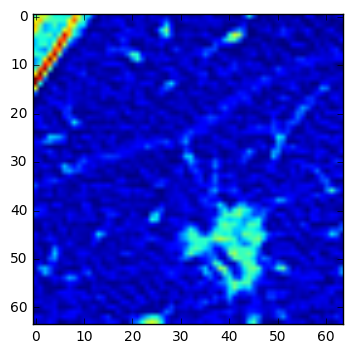

In [137]:
img=np.reshape(val_img[61] , newshape=(64,64))
plt.imshow(img)

In [162]:
va_2=np.asarray(val_pred_2)
top=find_top5(va_2) 
print top[0]
print top[1]
print top[2]
print top[3]
print top[4]

59
107
109
129
116


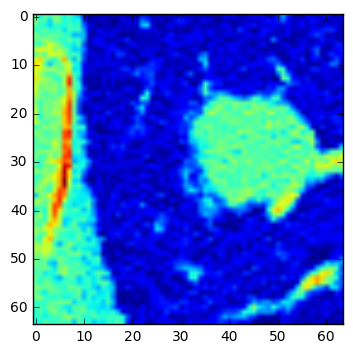

In [210]:
img=np.reshape(val_img_1[17] , newshape=(64,64))
plt.imshow(img)

In [170]:
va_3=np.asarray(val_pred_3)
top=find_top5(va_3) 
print top[0]
print top[1]
print top[2]
print top[3]
print top[4]

140
115
144
106
117


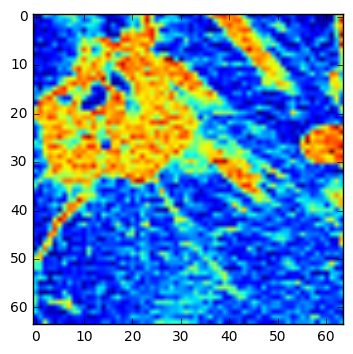

In [174]:
img=np.reshape(val_img_2[117] , newshape=(64,64))
plt.imshow(img)

In [175]:
test_=np.asarray(test_pred)
top=find_top5(test_) 
print top[0]
print top[1]
print top[2]
print top[3]
print top[4]

5
4
19
118
117


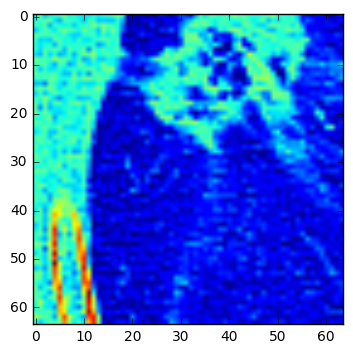

In [181]:
img=np.reshape(test_img[19] , newshape=(64,64))
plt.imshow(img)

In [34]:
print find(np,np.max(val_pred_1)) 
print val_pred_2 
print val_pred_3
print test_pred


0.657513
[[ 0.37167177  0.62832826]
 [ 0.35672182  0.64327818]
 [ 0.40012378  0.59987622]
 [ 0.42993569  0.57006431]
 [ 0.44015959  0.55984038]
 [ 0.5249092   0.4750908 ]
 [ 0.55544645  0.44455355]
 [ 0.39153451  0.60846549]
 [ 0.39773643  0.60226357]
 [ 0.40667     0.59332997]
 [ 0.39627209  0.60372788]
 [ 0.43238181  0.56761813]
 [ 0.44566393  0.55433607]
 [ 0.39833602  0.60166401]
 [ 0.46152249  0.53847754]
 [ 0.42467922  0.57532072]
 [ 0.39537272  0.60462725]
 [ 0.50847071  0.49152932]
 [ 0.42696315  0.57303685]
 [ 0.40416628  0.59583372]
 [ 0.40447259  0.59552747]
 [ 0.38615713  0.6138429 ]
 [ 0.37549928  0.62450081]
 [ 0.39790848  0.60209149]
 [ 0.37974849  0.62025154]
 [ 0.34248674  0.65751326]
 [ 0.36599857  0.63400143]
 [ 0.40490597  0.59509408]
 [ 0.42232665  0.57767338]
 [ 0.44213134  0.55786872]
 [ 0.5376845   0.46231556]
 [ 0.45475671  0.54524332]
 [ 0.40443975  0.59556025]
 [ 0.3858856   0.61411446]
 [ 0.40421179  0.59578824]
 [ 0.40631428  0.59368569]
 [ 0.4042756   0.59

In [29]:
print softmax_

[[ 0.40446439  0.59553558]
 [ 0.36146724  0.63853276]
 [ 0.3913655   0.60863453]
 [ 0.50173223  0.49826777]
 [ 0.50203949  0.49796054]
 [ 0.56696218  0.43303785]
 [ 0.55999267  0.44000733]
 [ 0.38666236  0.61333764]
 [ 0.39560705  0.60439289]
 [ 0.39975575  0.60024428]
 [ 0.38709405  0.61290592]
 [ 0.3845318   0.61546826]
 [ 0.42242506  0.57757491]
 [ 0.39499441  0.60500556]
 [ 0.46685159  0.53314841]
 [ 0.47546431  0.52453572]
 [ 0.40410474  0.59589535]
 [ 0.4813087   0.5186913 ]
 [ 0.4819091   0.51809084]
 [ 0.50580519  0.49419487]
 [ 0.40386522  0.59613478]
 [ 0.38238651  0.61761349]
 [ 0.36327171  0.63672829]
 [ 0.39543718  0.60456282]
 [ 0.37377021  0.62622982]
 [ 0.32901388  0.67098612]
 [ 0.3596043   0.6403957 ]
 [ 0.38487986  0.61512011]
 [ 0.39625272  0.60374737]
 [ 0.43828768  0.56171232]
 [ 0.56993163  0.43006837]
 [ 0.42295364  0.57704633]
 [ 0.40077826  0.59922171]
 [ 0.37931669  0.62068337]
 [ 0.39953572  0.60046434]
 [ 0.40125582  0.59874415]
 [ 0.39818567  0.60181433]
 

In [30]:
test_img=np.load('/home/seongjung/save_numpy/1.npy')
print np.shape(test_img)


IOError: [Errno 2] No such file or directory: '/home/seongjung/save_numpy/1.npy'

In [ ]:
try:
    softmax_=sess.run( accuracy , feed_dict={x:test_img  , keep_prob: 1.0})
    test_accuracy = sess.run( accuracy , feed_dict={x:test_img , y_:test_lab , keep_prob: 1.0})        
    test_loss = sess.run(cost , feed_dict = {x:test_img , y_: test_lab , keep_prob: 1.0})

    #result = sess.run(sm_conv , feed_dict = {x:test_img , y_:batch_ys , keep_prob :1.0})
    print("step %d , testidation  accuracy %g" %(i,test_accuracy))
    print("step %d , testidation loss : %g" %(i,test_loss))
    test_str = 'step:\t'+str(i)+'\ttest_loss:\t'+str(test_loss) +'\ttest accuracy:\t'+str(test_accuracy)+'\n'

    f.write(test_str)
except :
    list_acc=[]
    list_loss=[]
    n_divide=len(test_img)/batch_size
    for j in range(n_divide):

        # j*batch_size :(j+1)*batch_size
        test_accuracy,test_loss = sess.run([accuracy ,cost], feed_dict={x:test_img[ j*batch_size :(j+1)*batch_size] , y_:test_lab[ j*batch_size :(j+1)*batch_size ] , keep_prob: 1.0})        
        list_acc.append(float(test_accuracy))
        list_loss.append(float(test_loss))
    test_accuracy , test_loss=sess.run([accuracy,cost] , feed_dict={x:test_img[(j+1)*batch_size : ] , y_:test_lab[(j+1)*(batch_size) : ] , keep_prob : 1.0})
    #right above code have to modify

    list_acc.append(test_accuracy)
    list_loss.append(test_loss)
    list_acc=np.asarray(list_acc)
    list_loss= np.asarray(list_loss)

    test_accuracy=np.mean(list_acc)
    test_loss = np.mean(list_loss)

    #result = sess.run(sm_conv , feed_dict = {x:test_img , y_:batch_ys , keep_prob :1.0})
    print("step %d , testidation  accuracy %g" %(i,test_accuracy))
    print("step %d , testidation loss : %g" %(i,test_loss))
    test_str = 'step:\t'+str(i)+'\ttest_loss:\t'+str(test_loss) +'\ttest accuracy:\t'+str(test_accuracy)+'\n'

    f.write(test_str)


In [ ]:
sess.close()


In [ ]:
plt.imshow(train_img[8])
train_lab[8]

In [ ]:
plt.imshow(test_img[1])